In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Feedback resistance
rf_bits = {3:25, 2:50, 1:66.66, 0: 100}
rf_vals = {}

for rf_id in range(16):
    val_r = 0
    for i in range(4):
        r_enable = (rf_id >> i) & 0x1
        if r_enable: val_r += 1/float(rf_bits[i])

    val = 1/float(val_r) if val_r != 0 else 0
    
    rf_vals[rf_id] = int(val*100)/100.

In [4]:
## Feedback capacitor

cf_bits = {3:50, 2:100, 1:200, 0: 400}
cf_vals = {}

for cf_id in range(16):
    val = 0
    for i in range(4):
        r_enable = (cf_id >> i) & 0x1
        if r_enable: val += float(cf_bits[i])
    
    cf_vals[cf_id] = int(val*100)/100.

In [5]:
## Feedback compenstation capacitor

cf_comp_bits = {0: 100, 1: 200}
cf_comp_vals = {}

for cf_comp_id in range(4):
    val = 0
    for i in range(2):
        r_enable = (cf_comp_id >> i) & 0x1
        if r_enable: val += float(cf_comp_bits[i])
    
    cf_comp_vals[cf_comp_id] = int(val*100)/100.

In [6]:
cf_comp_vals

{0: 0.0, 1: 100.0, 2: 200.0, 3: 300.0}

In [7]:
cf_vals

{0: 0.0,
 1: 400.0,
 2: 200.0,
 3: 600.0,
 4: 100.0,
 5: 500.0,
 6: 300.0,
 7: 700.0,
 8: 50.0,
 9: 450.0,
 10: 250.0,
 11: 650.0,
 12: 150.0,
 13: 550.0,
 14: 350.0,
 15: 750.0}

In [8]:
rf_vals, 

({0: 0.0,
  1: 100.0,
  2: 66.66,
  3: 39.99,
  4: 50.0,
  5: 33.33,
  6: 28.57,
  7: 22.22,
  8: 25.0,
  9: 20.0,
  10: 18.18,
  11: 15.38,
  12: 16.66,
  13: 14.28,
  14: 13.33,
  15: 11.76},)

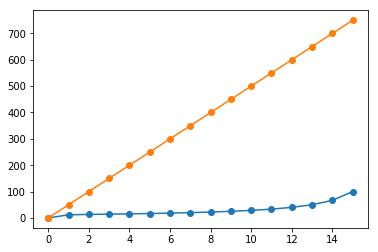

In [9]:
plt.plot(sorted(rf_vals.values()),"o-")
plt.plot(sorted(cf_vals.values()),"o-")

In [10]:
cfs = np.array(sorted(cf_vals.values()))[1:]
rfs = np.array(sorted(rf_vals.values()))[1:]

In [11]:
cfs = np.array(sorted(cf_vals.values()))
cf_comps = np.array(sorted(cf_comp_vals.values()))

In [12]:
#cf_tot = 1/np.add.outer(1/cfs, 1/cf_comps)
cf_tot = np.add.outer(cfs, cf_comps)

In [13]:
cf_tot

array([[   0.,  100.,  200.,  300.],
       [  50.,  150.,  250.,  350.],
       [ 100.,  200.,  300.,  400.],
       [ 150.,  250.,  350.,  450.],
       [ 200.,  300.,  400.,  500.],
       [ 250.,  350.,  450.,  550.],
       [ 300.,  400.,  500.,  600.],
       [ 350.,  450.,  550.,  650.],
       [ 400.,  500.,  600.,  700.],
       [ 450.,  550.,  650.,  750.],
       [ 500.,  600.,  700.,  800.],
       [ 550.,  650.,  750.,  850.],
       [ 600.,  700.,  800.,  900.],
       [ 650.,  750.,  850.,  950.],
       [ 700.,  800.,  900., 1000.],
       [ 750.,  850.,  950., 1050.]])

In [14]:
cf_tot = cf_tot.ravel()
cf_tot = cf_tot[cf_tot < 1e6]
cf_tot = cf_tot[cf_tot > 0]

In [15]:
plt.plot(cf_tot)

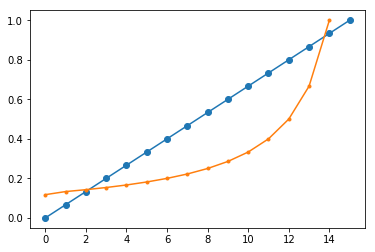

In [16]:
plt.plot(cfs/ cfs[-1], "o-")
plt.plot(rfs/ rfs[-1], ".-")

In [35]:
#plt.plot(cfs * rfs[::-1], "o-")

In [217]:
gains= np.outer(cf_tot, rfs).ravel()

In [218]:
#gains= np.outer(cfs, rfs).ravel()

In [219]:
plt.figure(figsize = (10,8))

#ref_ts = 1/(1/200.+1/200.)*33.33
#ref_ts = 200.*33.33
ref_ts = 400 * 33

plt.plot(gains, "o-")
plt.gca().axhline(ref_ts, 0,1, color = "k")

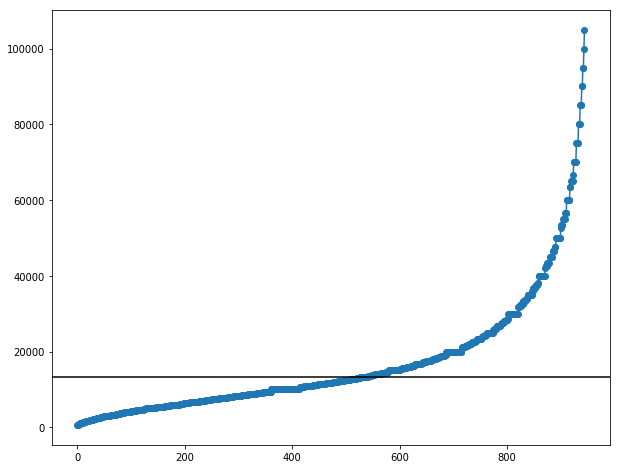

In [220]:
plt.figure(figsize = (10,8))

plt.plot(sorted(gains), "o-")
plt.gca().axhline(ref_ts, 0,1, color = "k")

38


(-1.85, 38.85)

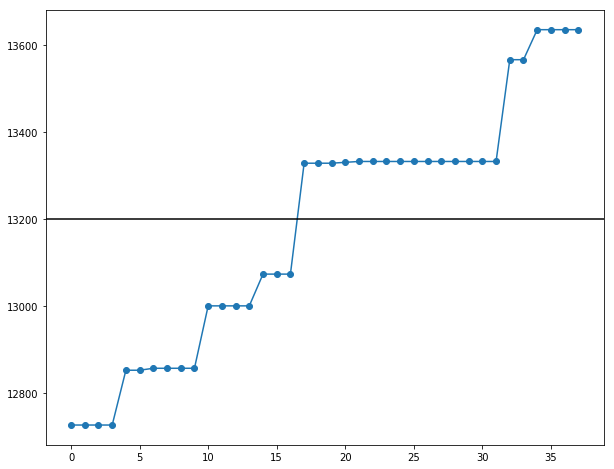

In [228]:
plt.figure(figsize = (10,8))

sel = abs(gains - ref_ts) < 1200

print np.count_nonzero(sel)

plt.plot(sorted(gains[sel]), "o-")
plt.gca().axhline(ref_ts, 0,1, color = "k")

plt.xlim()

In [229]:
np.unique(gains)

array([12726. , 12852. , 12856.5, 13000. , 13073. , 13328. , 13330. ,
       13332. , 13566. , 13635. ])

In [230]:
len(np.unique(gains))

10

In [203]:
import pandas as pd

In [231]:
gains= np.outer(cf_tot, rfs).ravel()
rf_rav = np.tile(rfs,len(cf_tot))
cf_rav = np.tile(cf_tot,len(rfs))

In [232]:
len(cf_rav), len(rf_rav), len(gains)

(945, 945, 945)

In [233]:
df_gains = pd.DataFrame({"cf":cf_rav, "rf":rf_rav})

In [234]:
df_gains["rc"] = df_gains.cf * df_gains.rf

In [235]:
d1 = pd.DataFrame({"cf":cf_tot})
d2 = pd.DataFrame({"rf":rfs})

In [236]:
d1.apply(lambda x: d2.mul(x, axis=0).stack()).unstack()

cf
         rf
0    1176.0
1    2666.0
2    4284.0
3     769.0
4    2499.0
5    4545.0
6    7000.0
7    2222.0
8    5000.0
9    8571.0
10  13332.0
11   5998.5
12  12500.0
13  23331.0
14  45000.0

In [237]:
df_gains.head()

cf     rf      rc
0  100.0  11.76  1176.0
1  200.0  13.33  2666.0
2  300.0  14.28  4284.0
3   50.0  15.38   769.0
4  150.0  16.66  2499.0

In [238]:
plt.figure(figsize = (10,8))

sel = abs(df_gains.rc - ref_ts) < 150
gains = df_gains.rc[sel]


plt.plot(sorted(gains), "o-")
plt.gca().axhline(ref_ts, 0,1, color = "k")

plt.ylim()

(13060.05, 13344.95)

In [240]:
sel = abs(df_gains.rc - ref_ts) < 500
print np.count_nonzero(sel)

42


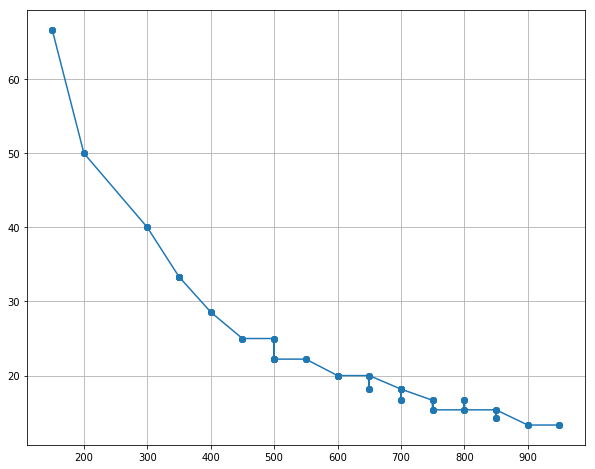

In [252]:
plt.figure(figsize = (10,8))

sel = abs(df_gains.rc - ref_ts) < 1000
df_sel = df_gains[sel].sort_values("cf")

plt.plot(df_sel.cf - 50 , df_sel.rf, "o-")

plt.ylim()
plt.grid()

In [245]:
len(df_sel.cf.unique())

16

In [183]:
gains= np.multiply.outer(cfs[1:], rfs)#.ravel()

In [184]:
gains.shape

(15, 15)

In [185]:
len(gains.ravel())

225

In [186]:
len(np.unique(gains.ravel()))

188

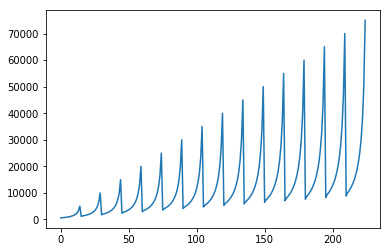

In [187]:
plt.plot(gains.ravel())

7


(-0.30000000000000004, 6.3)

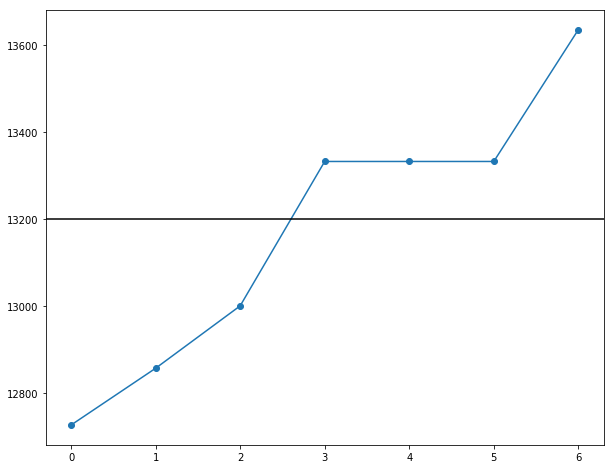

In [188]:
plt.figure(figsize = (10,8))

sel = abs(gains - ref_ts) < 500
gains = gains[sel]

print np.count_nonzero(sel)

plt.plot(sorted(gains), "o-")
plt.gca().axhline(ref_ts, 0,1, color = "k")

plt.xlim()

In [189]:
rfs

array([ 11.76,  13.33,  14.28,  15.38,  16.66,  18.18,  20.  ,  22.22,
        25.  ,  28.57,  33.33,  39.99,  50.  ,  66.66, 100.  ])

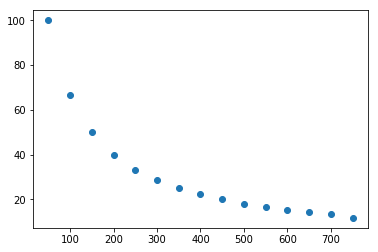

In [253]:
plt.plot(cfs[1:],rfs[::-1],"o")

In [254]:
x = cfs[:5]
y = [66,50,40,33,28]

plt.plot(x,y)

In [264]:
cf_tot2 = np.unique(cf_tot) 

In [265]:
len(cf_tot2)

21

In [266]:
plt.figure(figsize = (10,6))

plt.plot(cf_tot2[:14], rfs[:14][::-1], "o-")
plt.grid()

In [267]:
plt.figure(figsize = (10,6))

plt.plot(cf_tot2[:14] * rfs[:14][::-1], "o-")
plt.grid()

In [259]:
50 * 200

10000

In [ ]:
400 * 33.33

In [ ]:
700 * 16.66